# Random Forest Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
# n_estimators is the number of random decision trees it will apply
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting a new result

In [ ]:
new_level = [[6.5]]
new_salary = regressor.predict(new_level)
print(new_salary)

[167000.]


In [ ]:
new_level_near = [[6.501]]
new_salary_near = regressor.predict(new_level_near)
print(new_salary_near)

[210000.]


## Visualising the Decision Tree Regression results (low resolution)

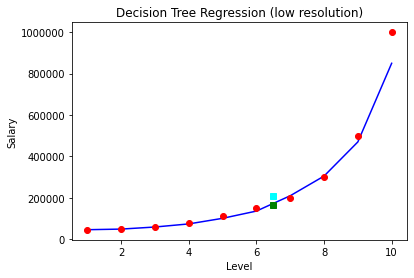

In [ ]:
y_pred = regressor.predict(X)
figure, axes = plt.subplots() 
axes.ticklabel_format(style='plain')
plt.scatter(X, y, color='red', zorder=2)
plt.plot(X, y_pred, color='blue', zorder=1)
plt.plot(new_level, new_salary, 's', color='green', zorder=2)
plt.plot(new_level_near, new_salary_near, 's', color='cyan', zorder=2)
plt.title('Random Forest Regression (low resolution)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show() # bad visualization of the model

## Visualising the Decision Tree Regression results (high resolution)

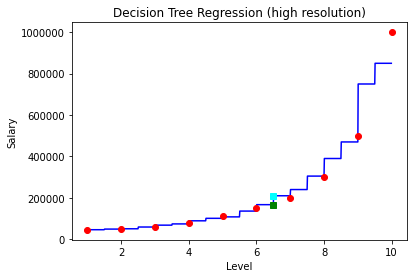

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
y_grid = regressor.predict(X_grid)
figure, axes = plt.subplots() 
axes.ticklabel_format(style='plain')
plt.scatter(X, y, color='red', zorder=2)
plt.plot(X_grid, y_grid, color='blue', zorder=1)
plt.plot(new_level, new_salary, 's', color='green', zorder=2)
plt.plot(new_level_near, new_salary_near, 's', color='cyan', zorder=2)
plt.title('Random Forest Regression (high resolution)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show() # good visualization of the model

## Visualising the Trees

In [ ]:
# Select a Tree of the Random Forest
estimator2 = regressor.estimators_[2] # Tree number 2 of 10

In [ ]:
# Export as .dot file
from sklearn.tree import export_graphviz
export_graphviz(estimator2, 
                out_file='random_forest_regression_tree.dot', 
                feature_names = ['Level'],
                leaves_parallel = True, rounded = True,
                impurity = False, proportion = False, 
                precision = 2, filled = True)

In [ ]:
# Convert to .png using system command
from subprocess import call
call(['dot', '-Tpng', 'random_forest_regression_tree.dot', '-o', 'random_forest_regression_tree.png', '-Gdpi=72'])

0

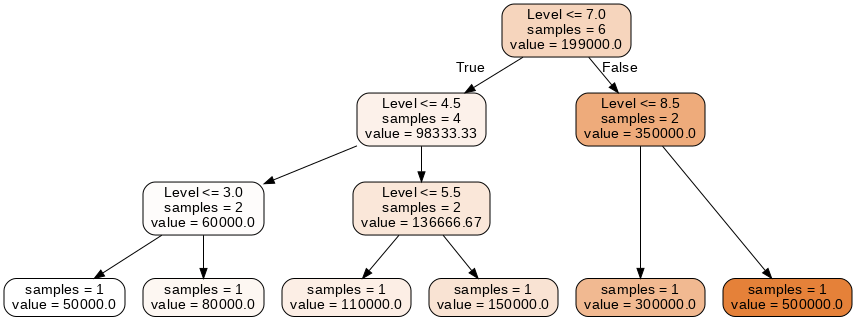

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'random_forest_regression_tree.png')